In [2]:
import pandas as pd

# Load your dataset
auto = pd.read_csv('../adverts.csv')

In [3]:
# Calculate the average price of each car make

costs = []
models = auto['standard_make'].unique()
for model in models:
    costs.append((model, int(auto.loc[auto["standard_make"]==model]["price"].mean())))
costs = pd.DataFrame(costs, columns=["standard_make", "cost"])

In [4]:
# Count the number of entries for each car make

make_counts = auto['standard_make'].value_counts(sort=True)
make_counts = pd.DataFrame({'standard_make':make_counts.index, 'count':make_counts.values})

In [5]:
# Combine the make counts and average price

# Ensure both frames are indexed by the make
make_counts = make_counts.set_index('standard_make')
costs = costs.set_index('standard_make')

combined = pd.concat([make_counts, costs], axis=1) # Combine the frames as columns

combined = combined.reset_index() # Set standard_make to column rather than index

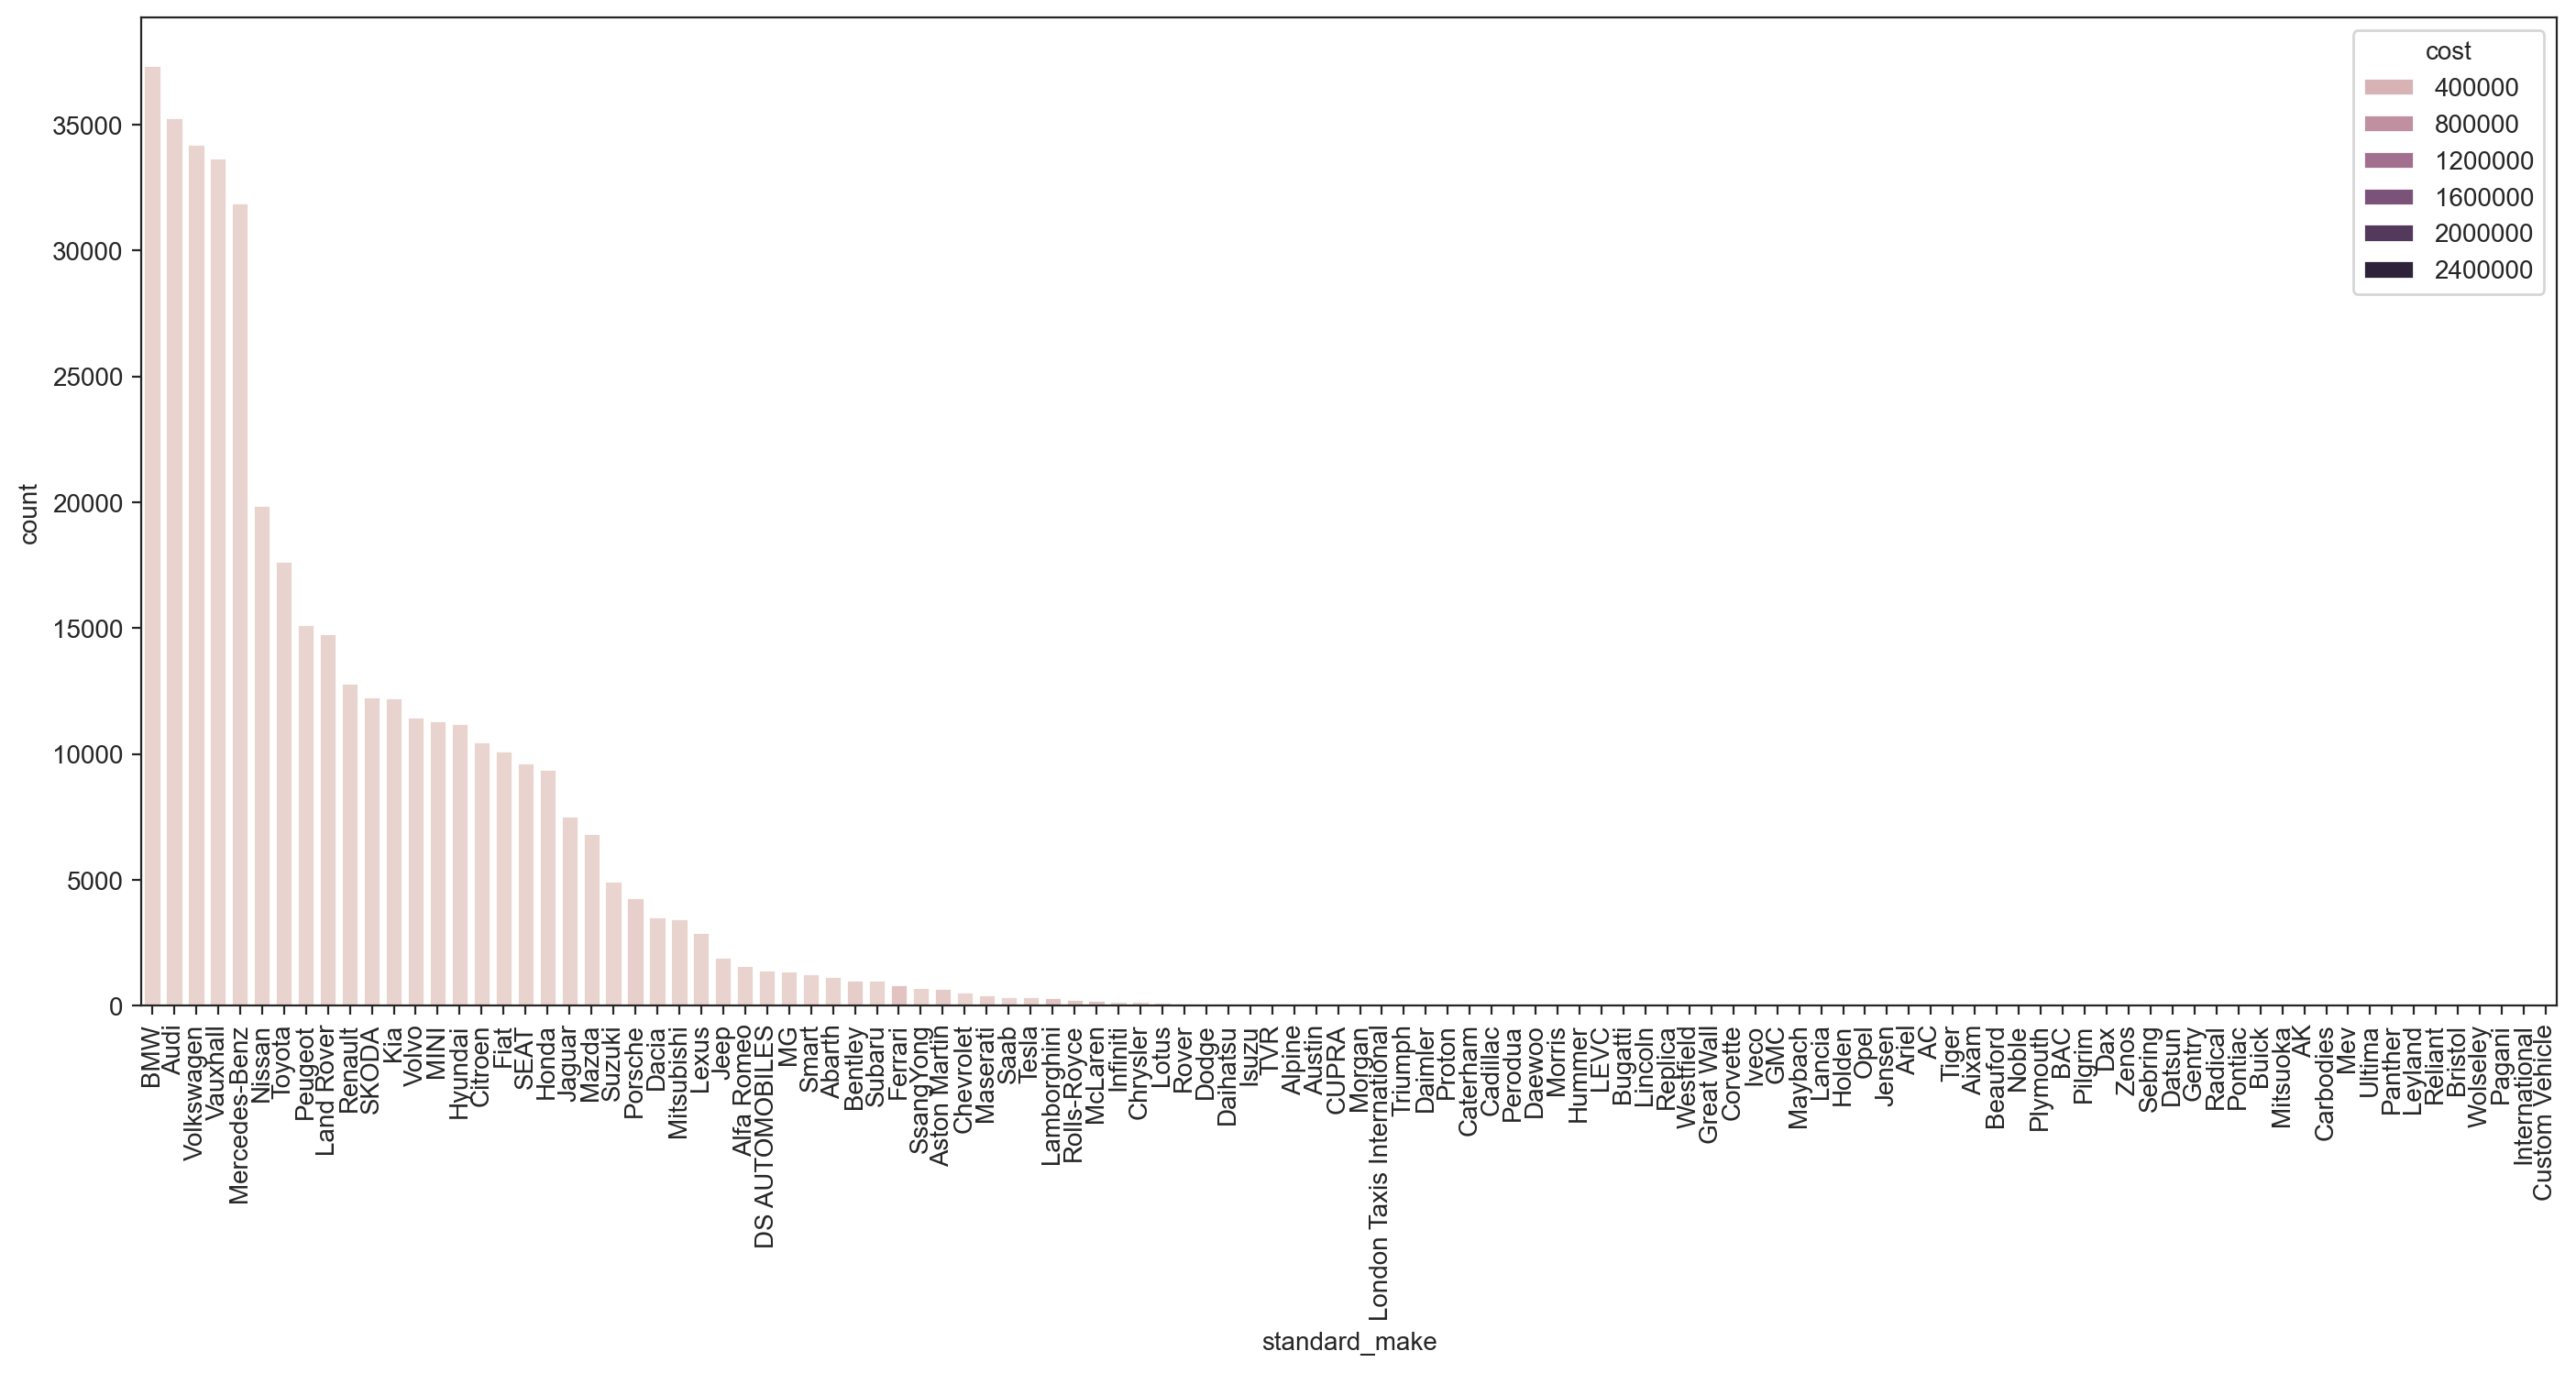

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(
    { "figure.figsize": (17, 7) },
    style='ticks',
    palette=sns.color_palette("Set2"),
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

sns.barplot(combined, y="count", x="standard_make", hue="cost")
plt.xticks(rotation=90)
plt.show()

In [7]:
combined.sort_values(by="cost", ascending=False)["standard_make"][:10]

107          Pagani
67          Bugatti
34          Ferrari
41      Lamborghini
43          McLaren
76           Lancia
42      Rolls-Royce
94          Radical
36     Aston Martin
81               AC
Name: standard_make, dtype: object

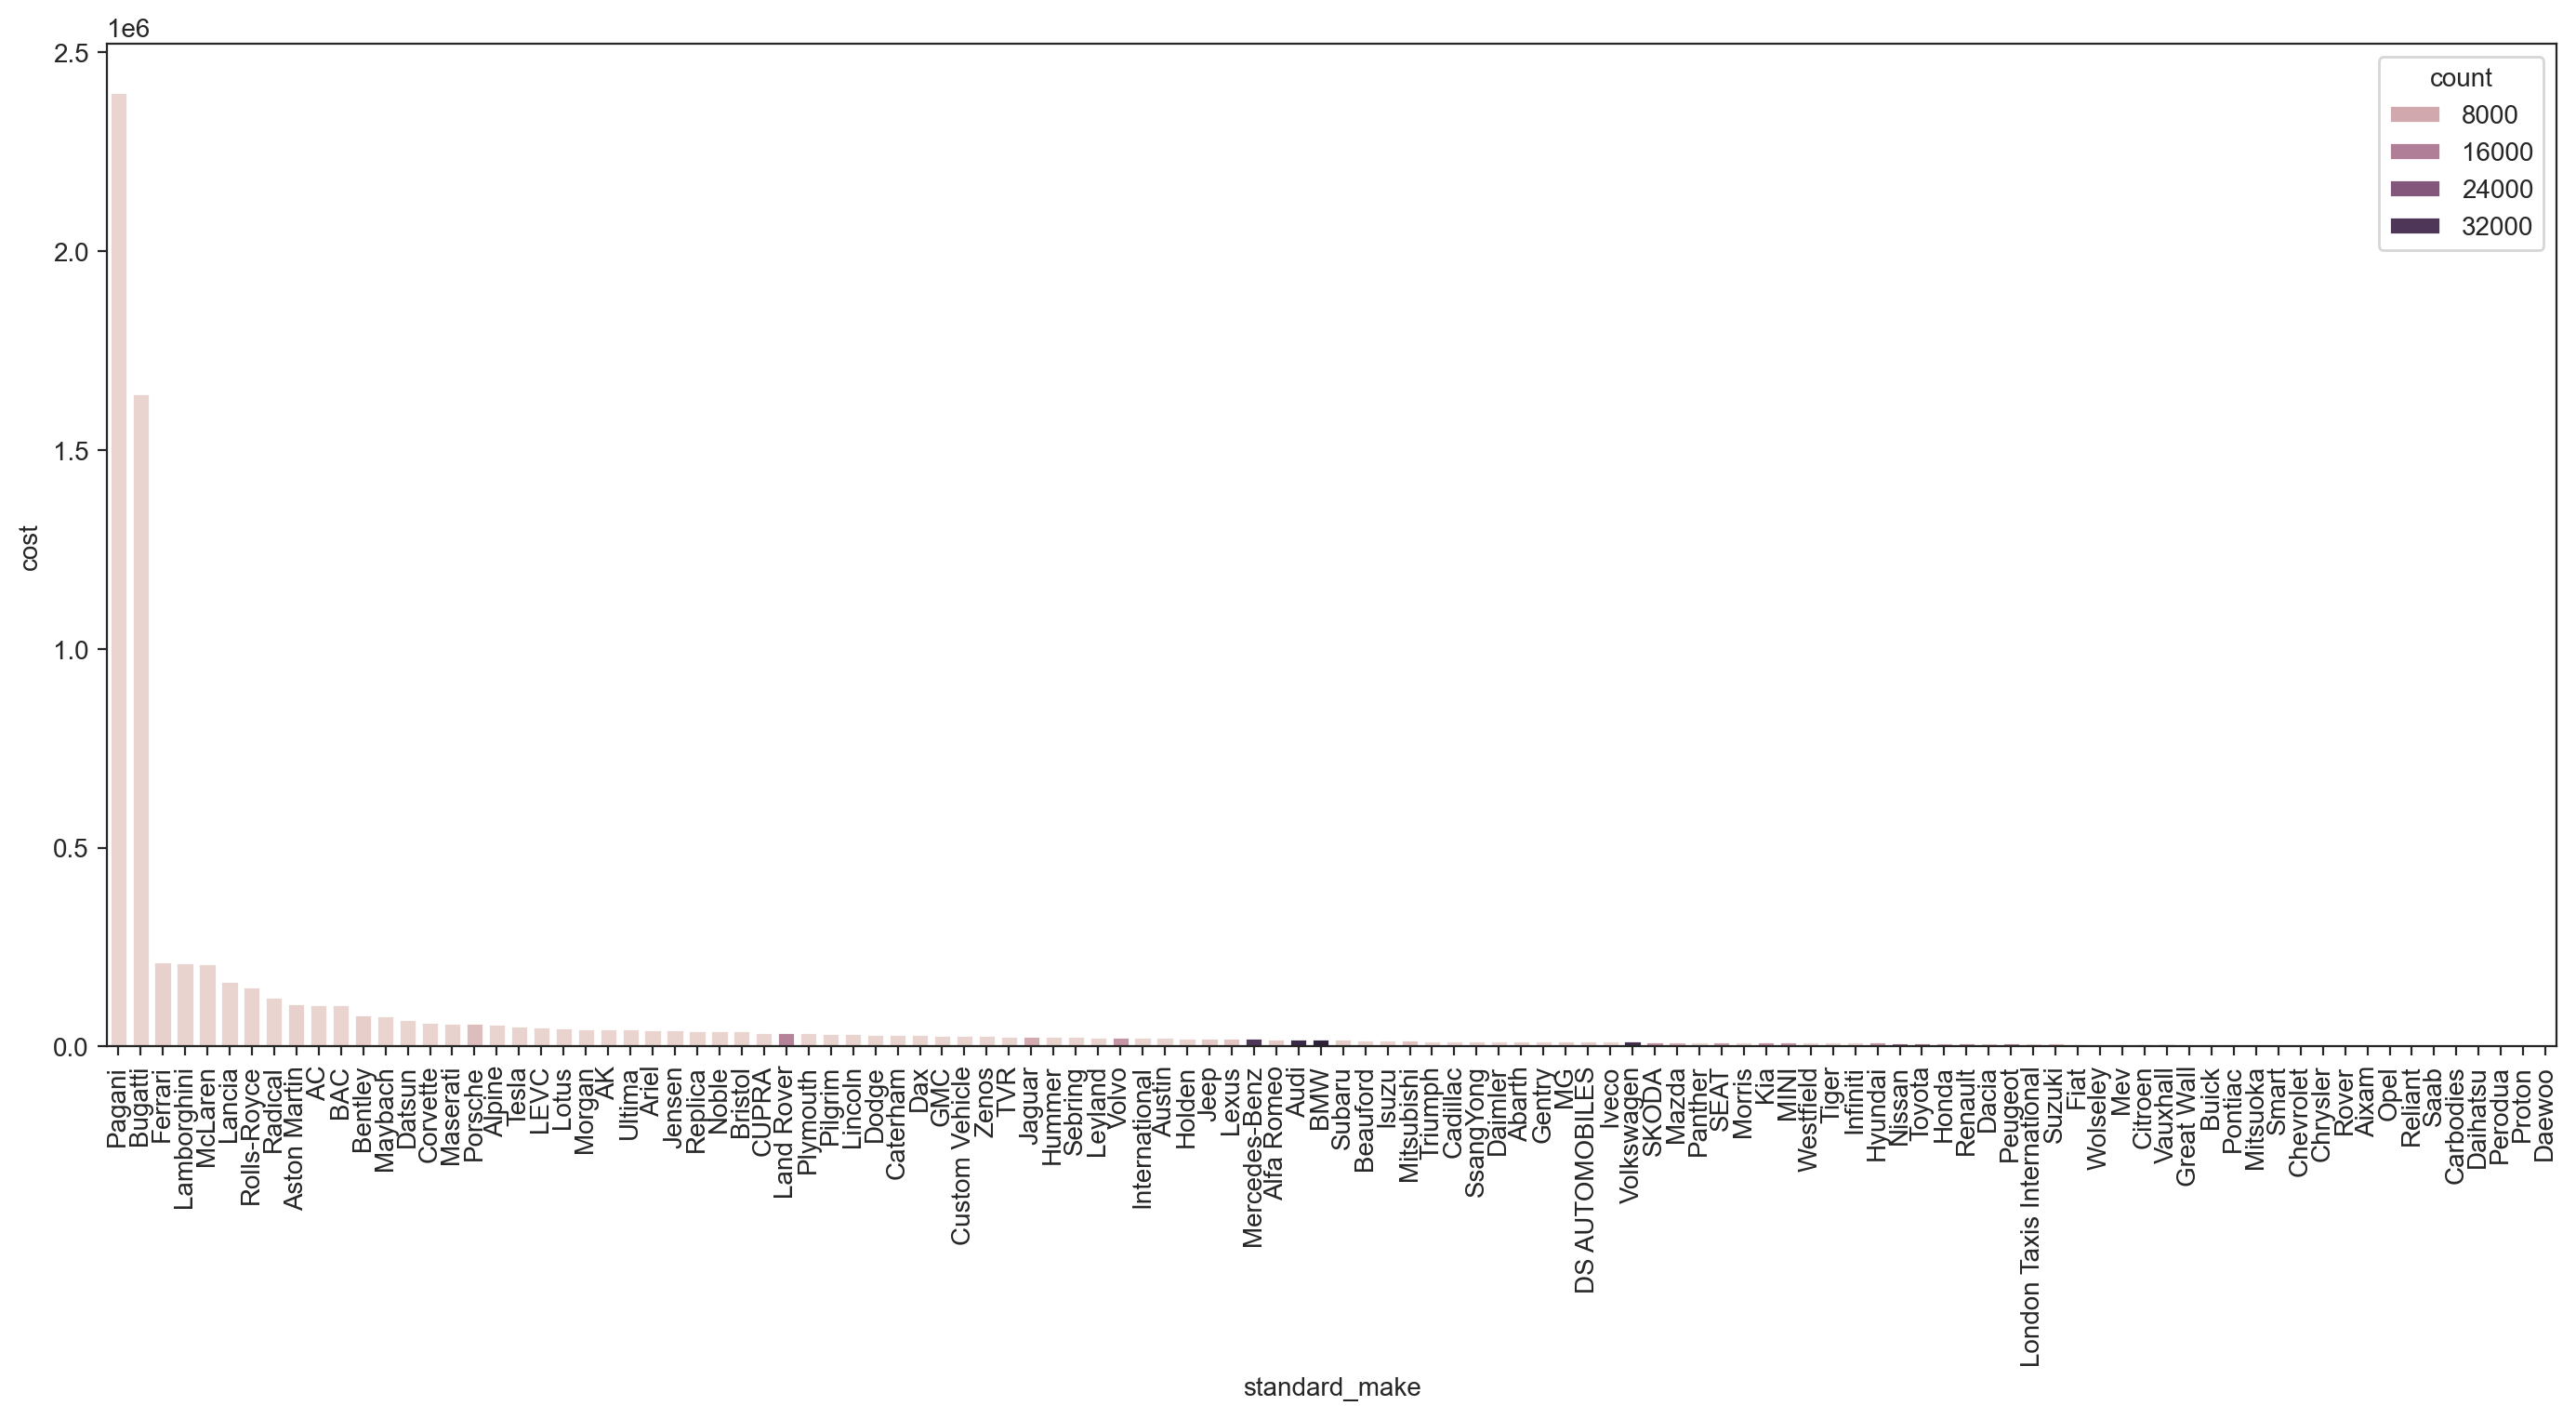

In [8]:
sns.barplot(combined.sort_values(by="cost", ascending=False), y="cost", x="standard_make", hue="count")
plt.xticks(rotation=90)
plt.show()

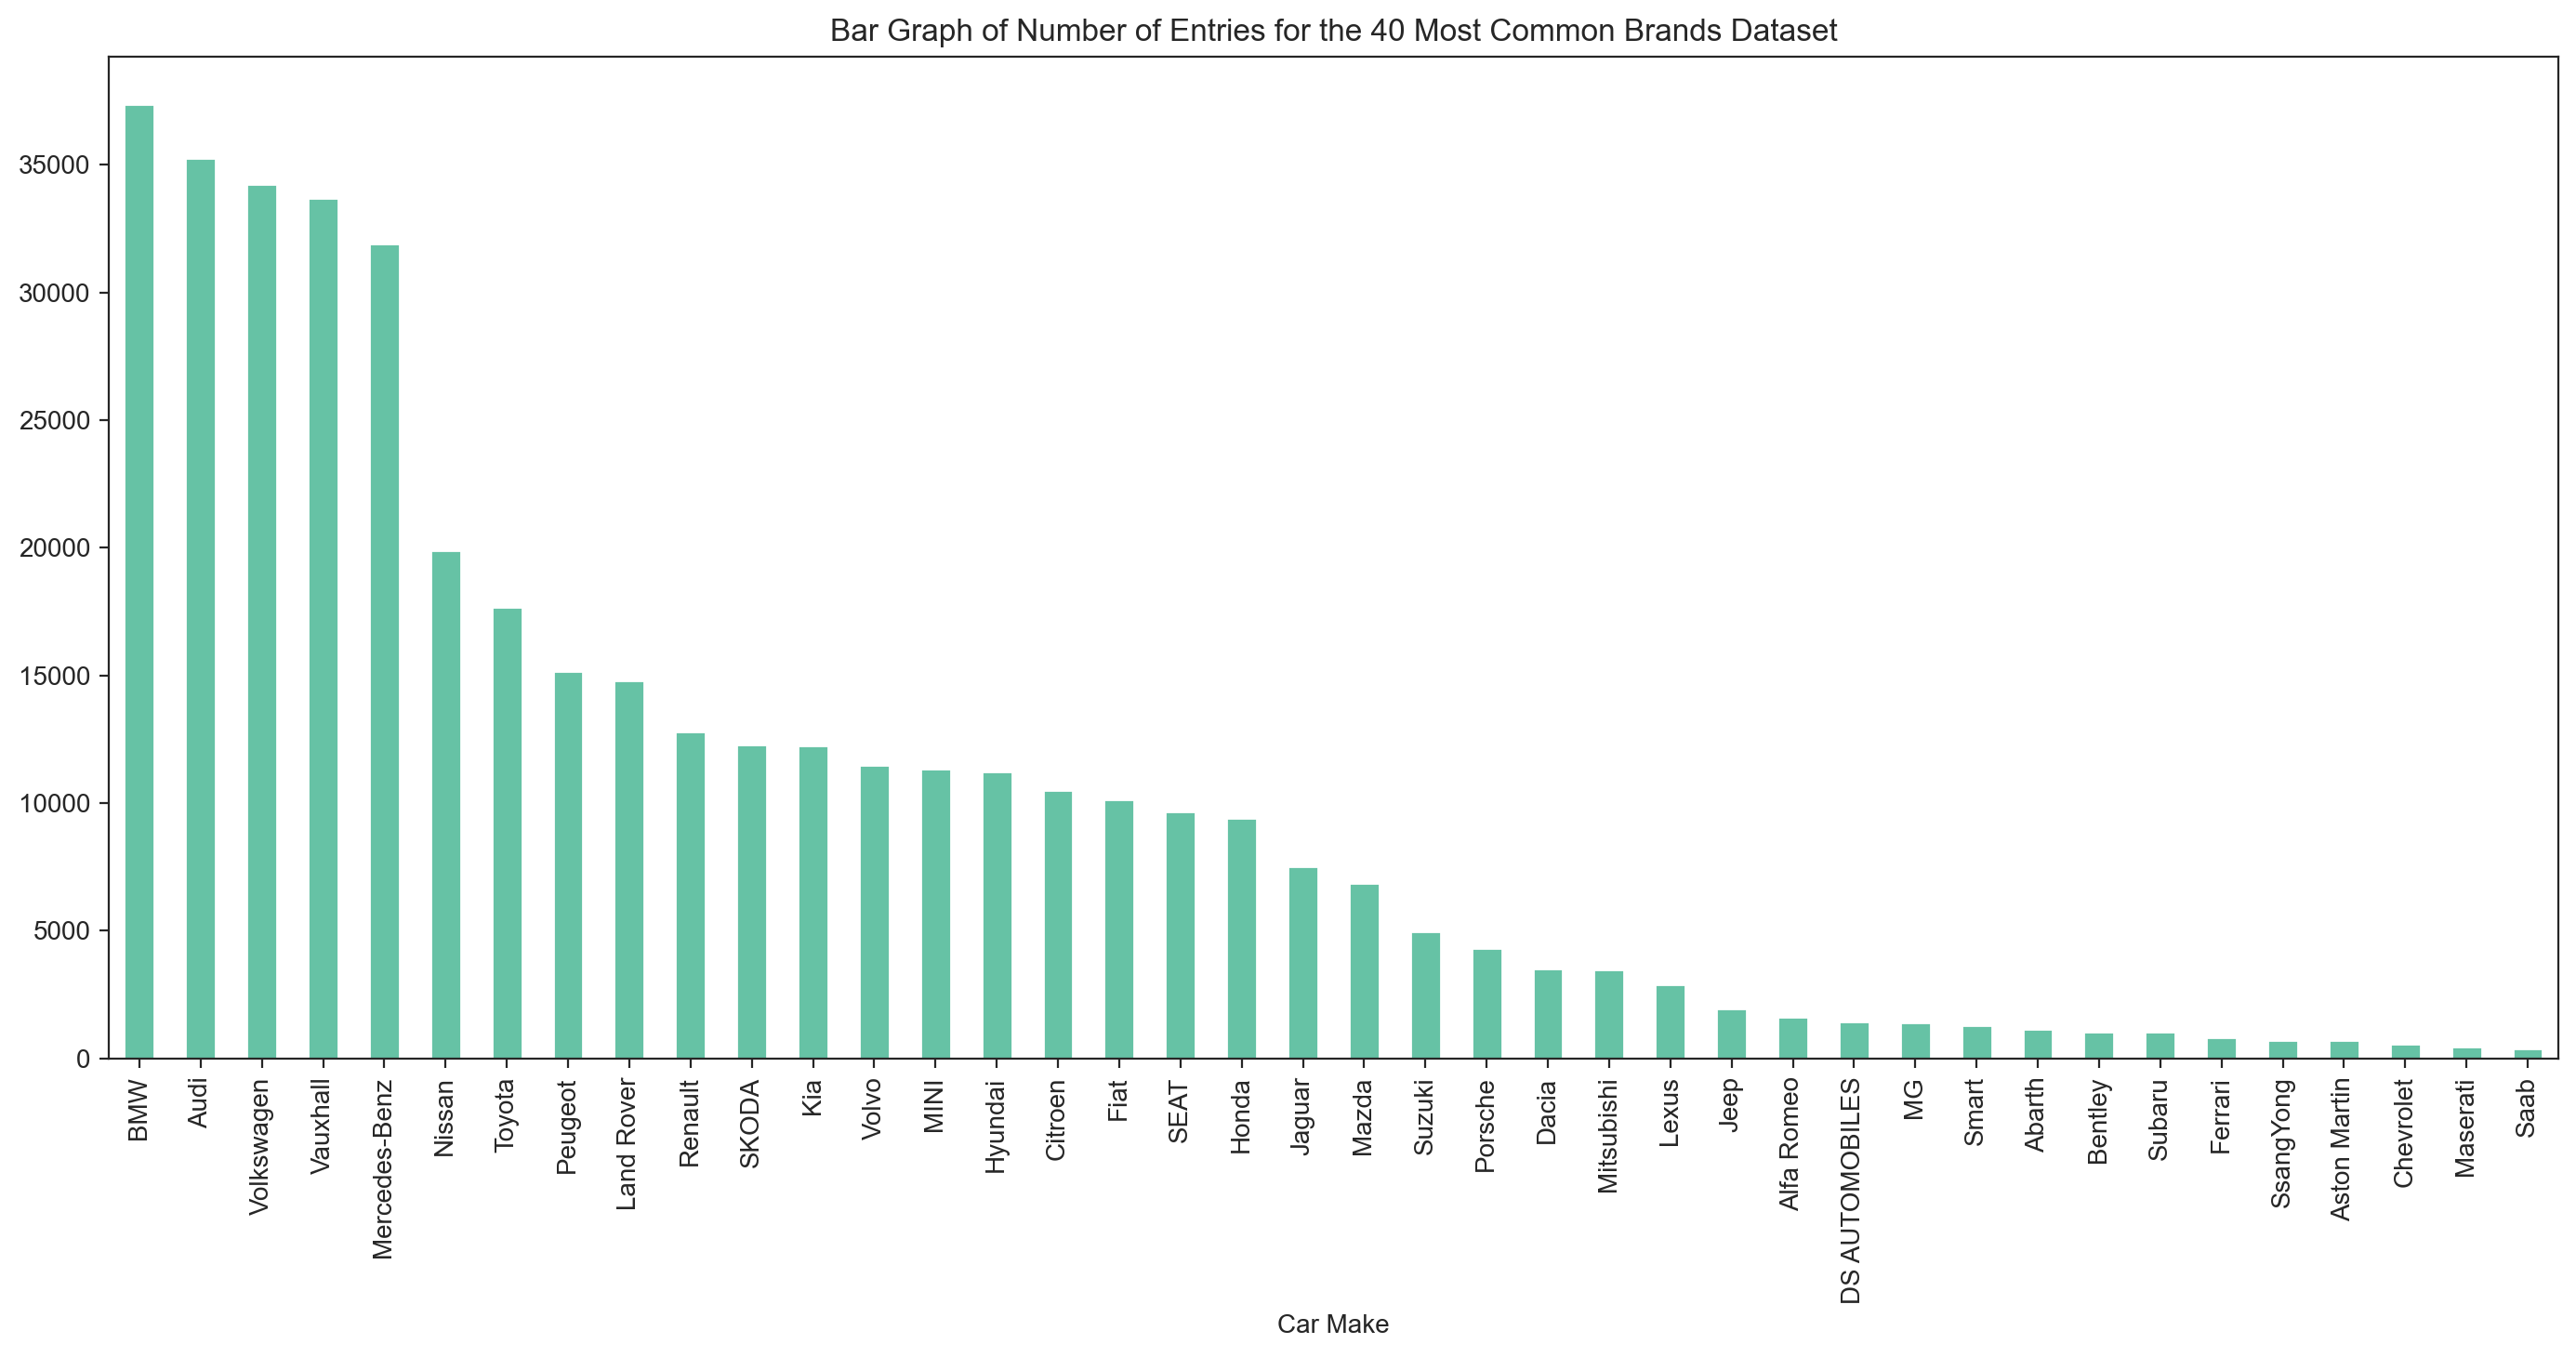

In [9]:
axes = auto['standard_make'].value_counts(sort=True)[:40].plot.bar()
axes.set_title("Bar Graph of Number of Entries for the 40 Most Common Brands Dataset");
axes.set_xlabel("Car Make");

In [10]:
# Drop all expensive makes

print("Dropping makes", auto.loc[auto["price"]>1e6]["standard_make"].unique())
spenny_makes = auto.loc[auto["price"]>1e6]["standard_make"].unique()
for make in spenny_makes:
    auto = auto.loc[auto["standard_make"]!=make]

Dropping makes ['Bugatti' 'Porsche' 'McLaren' 'Ferrari' 'Pagani' 'Maserati'
 'Aston Martin' 'Lamborghini']


In [11]:
# Drop any weird/annoying values

def map_to_int(str_list):
    map_dict = {}
    for i, value in enumerate(str_list):
        map_dict[value] = i
    return map_dict

# auto = auto.loc[auto["price"]<1e5]
auto = auto.drop(columns=["standard_colour", "standard_model", "public_reference"])
auto = auto.dropna()

# Map string values to integers
for column in ["standard_make", "reg_code", "body_type", "fuel_type", "crossover_car_and_van", "vehicle_condition"]:
    mapping_dict = map_to_int(auto[column].unique())                            
    auto[column] = auto[column].replace(to_replace=mapping_dict)



In [12]:
# Remove low variance features

from sklearn.feature_selection import VarianceThreshold

# Instantiate the VarianceThreshold object with a threshold value
threshold = 0.1  # Adjust threshold as needed
selector = VarianceThreshold(threshold)

# Fit the selector to your data
selector.fit(auto)

# Get the indices of features with high variance
high_variance_indices = selector.get_support(indices=True)

# Subset your data with selected features
selected_data = auto.iloc[:, high_variance_indices]

for col in auto.columns:
    if col not in selected_data.columns:
        print("Dropped", col)

selected_data.head()

Dropped vehicle_condition
Dropped crossover_car_and_van


,mileage,reg_code,standard_make,year_of_registration,price,body_type,fuel_type
1,108230.0,0,0,2011.0,7000,0,0
2,7800.0,1,1,2017.0,14000,1,1
3,45000.0,2,2,2016.0,7995,2,0
4,64000.0,3,3,2015.0,26995,1,0
5,16000.0,1,4,2017.0,29000,3,1


### Split data for fitting

In [13]:
from sklearn.model_selection import train_test_split

X, y = auto.drop(columns="price"), auto["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regression

### MLP Regressor
(My Little Pony Regressor)

In [14]:
# Normalise input features to values 0-1

from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler() 
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

nn.fit(X_train, y_train)
nn.score(X_train, y_train), nn.score(X_test, y_test)

(0.35433215865029066, 0.3671878019692749)

In [ ]:
y_pred = nn.predict(X_test)
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp.head()

In [16]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

NameError: name 'df_temp' is not defined

In [17]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

NameError: name 'y_pred' is not defined

In [109]:
X_test.iloc[[0]]


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
y_test.iloc[[0]]

366725    6990
Name: price, dtype: int64

In [ ]:
nn.predict(X_test.iloc[[0]])

array([12418.00894421])

In [37]:
np.array([0.5343527 , 0.52080418, 0.42629521, 0.47077498, 0.6117846 ]).mean()# imp

0.5128023340000001

In [36]:
np.array([0.53490801, 0.5054836 , 0.427131  , 0.48785469, 0.56022955]).mean() #simp

0.5031213699999999

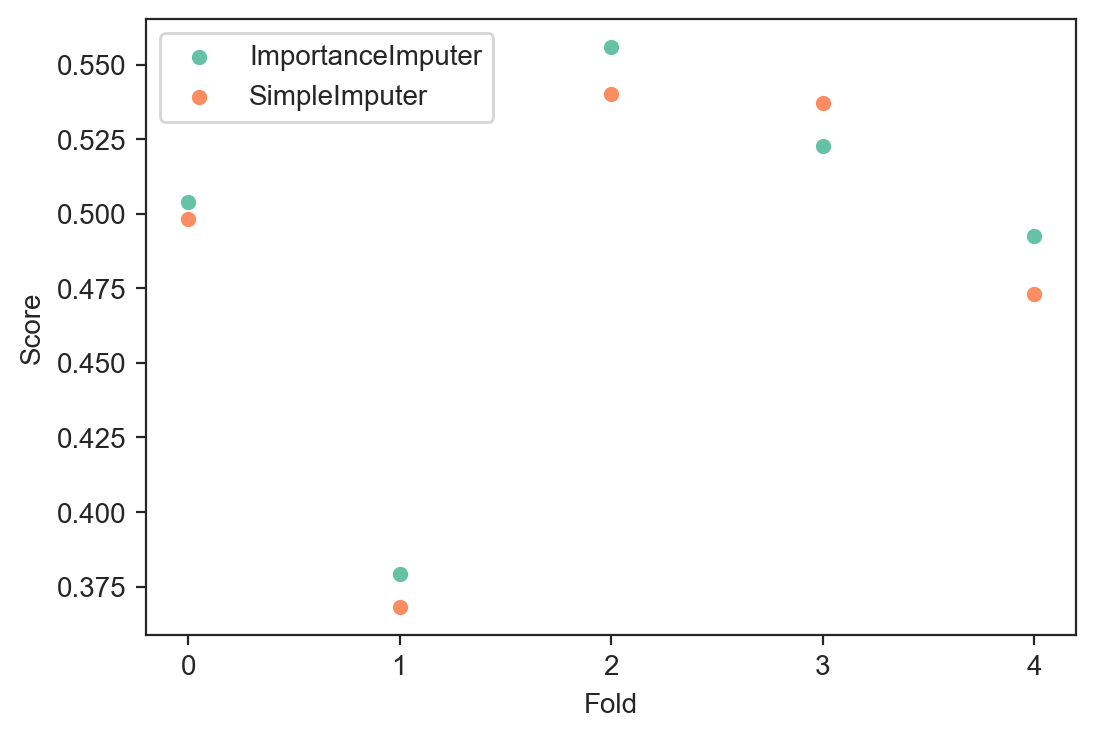

In [92]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

sns.set(
    {"figure.figsize": (6, 4)},
    style="ticks",
    palette=sns.color_palette("Set2"),
    color_codes=True,
    font_scale=0.8
)

%config InlineBackend.figure_format = "retina"

import warnings
warnings.filterwarnings("ignore")


ax = sns.scatterplot(np.array([0.50385229, 0.37914602, 0.55575394, 0.52268056, 0.49245531]), label="ImportanceImputer")
sns.scatterplot(np.array([0.49829258, 0.36798043, 0.54007971, 0.53700853, 0.47307779]), label="SimpleImputer")
# 100,000 Importance - array([0.50385229, 0.37914602, 0.55575394, 0.52268056, 0.49245531])
# 100,000 SimpleImputer - array([0.49829258, 0.36798043, 0.54007971, 0.53700853, 0.47307779])
# ax.tick_params(axis='x', colors="white")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Fold")
plt.ylabel("Score")
plt.savefig("/Users/hal/Documents/Essays/AutoML/imputertest.png", bbox_inches='tight', dpi=240)

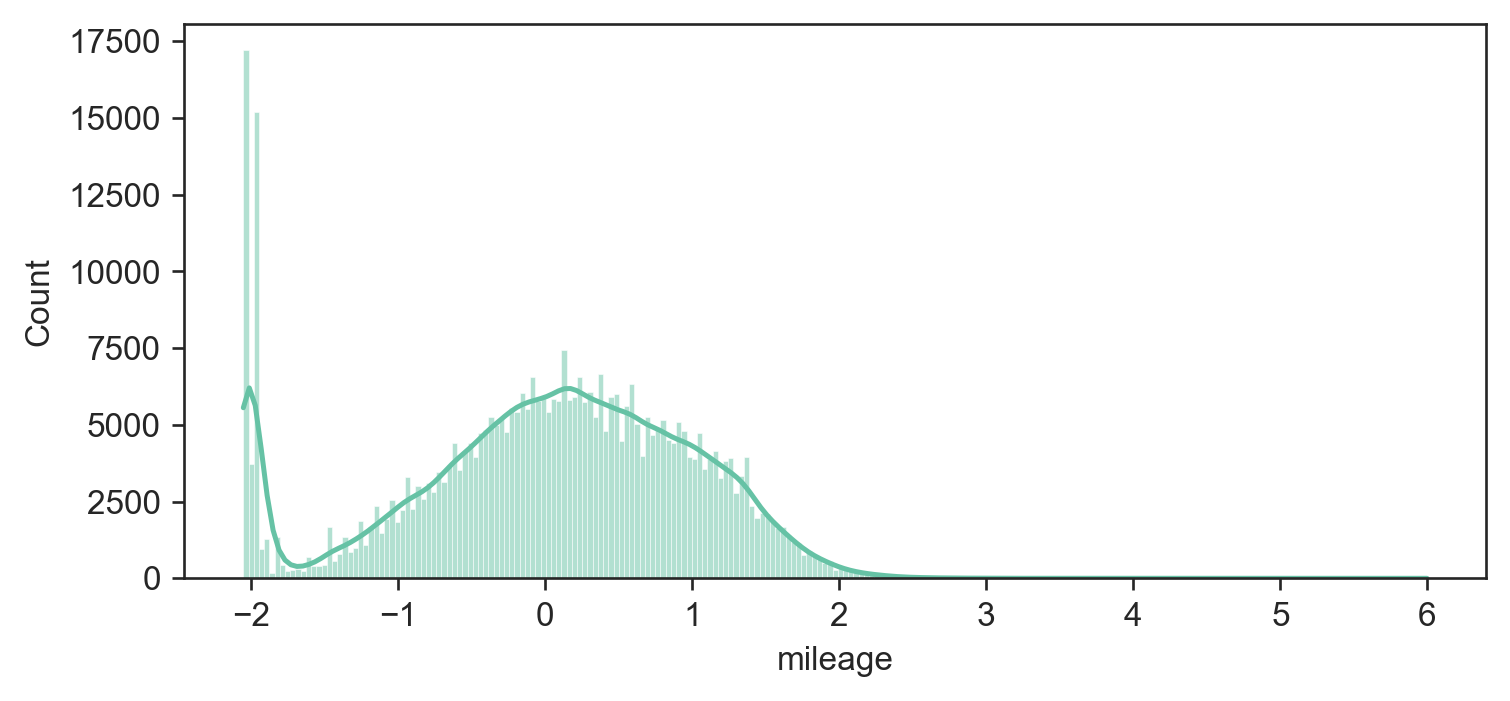

In [124]:
from sklearn.preprocessing import PowerTransformer, RobustScaler, MinMaxScaler

auto = pd.read_csv('../adverts.csv')

plt.figure(figsize=(7, 3), dpi=120)

robust = RobustScaler()
transform = PowerTransformer()
scale = MinMaxScaler()

cols_to_scale = ["mileage", "year_of_registration", "price"]

# Scale data for KNN imputing
scaled_data = transform.fit_transform(auto[cols_to_scale])
# scaled_data = scale.fit_transform(scaled_data)
auto[cols_to_scale] = pd.DataFrame(scaled_data, columns=cols_to_scale)
sns.histplot(auto["mileage"], kde=True)

plt.savefig("/Users/hal/Documents/Essays/AutoML/mileage_transformed.png", bbox_inches='tight', dpi=240)

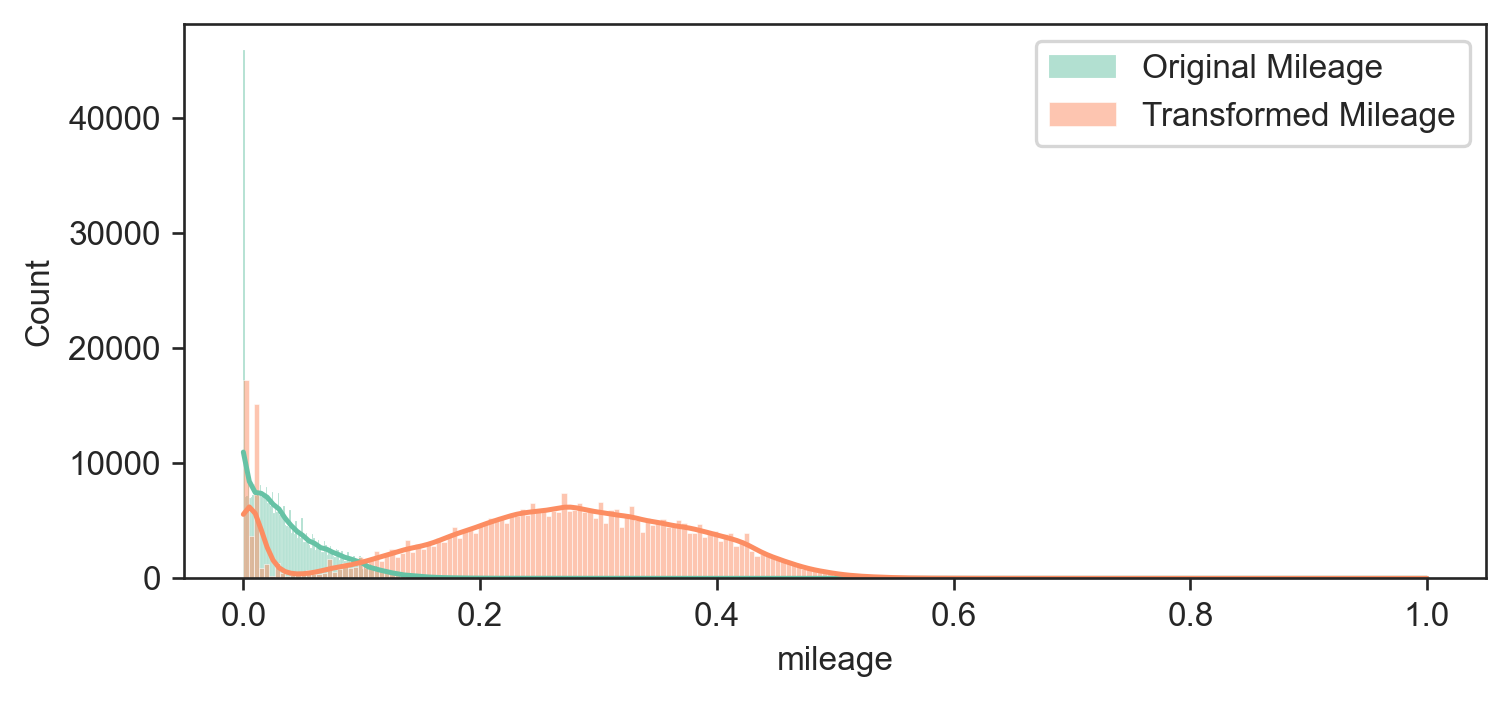

In [126]:
from sklearn.preprocessing import PowerTransformer, RobustScaler, MinMaxScaler

auto = pd.read_csv('../adverts.csv')
auto_copy = auto.copy()

plt.figure(figsize=(7, 3), dpi=120)

robust = RobustScaler()
transform = PowerTransformer()
scale = MinMaxScaler()

cols_to_scale = ["mileage", "year_of_registration", "price"]

# Scale data for KNN imputing
scaled_data = transform.fit_transform(auto[cols_to_scale])
scaled_data = scale.fit_transform(scaled_data)
auto_copy[cols_to_scale] = scale.fit_transform(auto_copy[cols_to_scale])
auto[cols_to_scale] = pd.DataFrame(scaled_data, columns=cols_to_scale)
sns.histplot(auto_copy["mileage"], kde=True, label="Original Mileage")
sns.histplot(auto["mileage"], kde=True, label="Transformed Mileage")
plt.legend()

plt.savefig("/Users/hal/Documents/Essays/AutoML/mileage_transformed_vs_og.png", bbox_inches='tight', dpi=240)

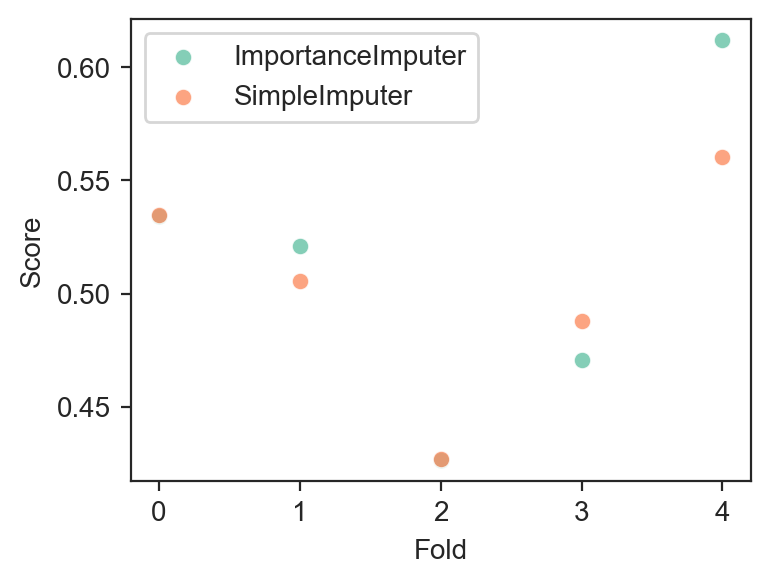

In [18]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

sns.set(
    {"figure.figsize": (4, 3)},
    style="ticks",
    palette=sns.color_palette("Set2"),
    color_codes=True,
    font_scale=0.8
)

%config InlineBackend.figure_format = "retina"

import warnings
warnings.filterwarnings("ignore")


ax = sns.scatterplot(np.array([0.5343527 , 0.52080418, 0.42629521, 0.47077498, 0.6117846]), label="ImportanceImputer",alpha=0.8)
sns.scatterplot(np.array([0.53490801, 0.5054836 , 0.427131  , 0.48785469, 0.56022955]), label="SimpleImputer", alpha=0.8)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("Fold")
plt.ylabel("Score")
plt.savefig("/Users/hal/Documents/Essays/AutoML/imputertest.png", bbox_inches='tight', dpi=240)

In [60]:
from scipy.stats import chi2_contingency, zscore
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import KNNImputer, SimpleImputer

class ImportanceImputer(BaseEstimator, TransformerMixin):
    '''
    Imputes categorical data by taking the mode of data which match other
    categorical features. The other categorical features are sorted based
    on their correlation with the target feature. To find the correlation
    Cramer's V is used. The imputer first attempts to locate entries that
    match every feature e.g. finding cars with the same make, model, year
    and condition. If no match is found, then the least important feature
    is ignored and the process continues until a minimum matching entries
    are found. Once found, the modes of the matches are filled in the gap.

    '''
    def __init__(self, impute_features, similar_threshold=1):
        self.impute_features = impute_features
        self.similar_threshold = similar_threshold
        self.ordered_features = {}

    def fit(self, X, y=None):
        X = X.copy()
        
        # Identify numeric and categorical features
        numerical_features = list(set(X.select_dtypes(include=[np.number]).columns))
        self.categorical_features_ = list(set(X.columns) - set(numerical_features))

        for feature in self.impute_features:
            # Compute Cramér"s V for categorical features
            self.cramer_dict_ = {}
            for feat in self.categorical_features_:
                if feat == feature: next
                
                contingency_table = pd.crosstab(X[feat], X[feature])
                chi2, _, _, _ = chi2_contingency(contingency_table)
                n = contingency_table.sum().sum()
                r, k = contingency_table.shape
                cramer_v = np.sqrt((chi2 / n) / (min(r, k) - 1))
                self.cramer_dict_[feat] = cramer_v

            self.cramer_dict_ = dict(sorted(self.cramer_dict_.items(), key=lambda x: -x[1]))

            ordered_features = list(self.cramer_dict_.keys())
            if feature in ordered_features: ordered_features.remove(feature)
            self.ordered_features[feature] = ordered_features

        return self

    def transform(self, X):
        X = X.copy()

        for feature in self.impute_features:
            # Impute missing values
            missing_indices = X[X[feature].isna()].index

            def impute_value(row):
                features_to_match = self.ordered_features[feature].copy()
                while features_to_match:
                    condition = True
                    for feat in features_to_match:
                        condition &= X[feat] == row[feat]
                    similar_entries = X.loc[condition & X[feature].notna()]
                    if len(similar_entries) >= self.similar_threshold:
                        return similar_entries[feature].mode()[0]
                    features_to_match.pop()

                return X[feature].mode()[0]

            # Apply imputation
            X.loc[missing_indices, feature] = X.loc[missing_indices].apply(impute_value, axis=1)

        return X

In [77]:
auto = pd.read_csv('../adverts.csv')

importance_imp = ImportanceImputer(impute_features=["standard_colour"])
simp_imp = SimpleImputer(strategy="most_frequent")

sample_size = 5000
auto = auto.dropna()

test_set = auto.sample(sample_size, random_state=42)
answers = test_set.copy()

# Simple Imputer test
auto.loc[test_set.index, "standard_colour"] = np.NaN

auto[["standard_colour"]] = simp_imp.fit_transform(auto[["standard_colour"]])
results = (auto.loc[test_set.index, "standard_colour"] == answers.loc[test_set.index, "standard_colour"]).value_counts()
print("SimpleImputer success rate:", results[1]/sample_size)

# Importance Imputer test
auto.loc[test_set.index, "standard_colour"] = np.NaN

auto["standard_colour"] = importance_imp.fit_transform(auto.drop(columns=["price"]))["standard_colour"]
results = (auto.loc[test_set.index, "standard_colour"] == answers.loc[test_set.index, "standard_colour"]).value_counts()
print("Importance imputer success rate:", results[1]/sample_size)

In [78]:
auto[["standard_colour"]] = simp_imp.fit_transform(auto[["standard_colour"]])
results = (auto.loc[test_set.index, "standard_colour"] == answers.loc[test_set.index, "standard_colour"]).value_counts()
print("SimpleImputer success rate:", results[1]/sample_size)

SimpleImputer success rate: 0.2174


In [79]:
auto.loc[test_set.index, "standard_colour"] = np.NaN
auto["standard_colour"] = importance_imp.fit_transform(auto.drop(columns=["price"]))["standard_colour"]
results = (auto.loc[test_set.index, "standard_colour"] == answers.loc[test_set.index, "standard_colour"]).value_counts()
print("Importance imputer success rate:", results[1]/sample_size)

{'standard_colour': ['vehicle_condition', 'standard_model', 'standard_make', 'reg_code', 'fuel_type', 'body_type', 'crossover_car_and_van']}
Importance imputer success rate: 0.284
